## Import

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['Q'] = df['date'].dt.to_period('Q').astype(str)
countries_df = pd.read_csv('countries_combined_data.csv')

## Część 1

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:


1.1. liczby nowych zachorowań,



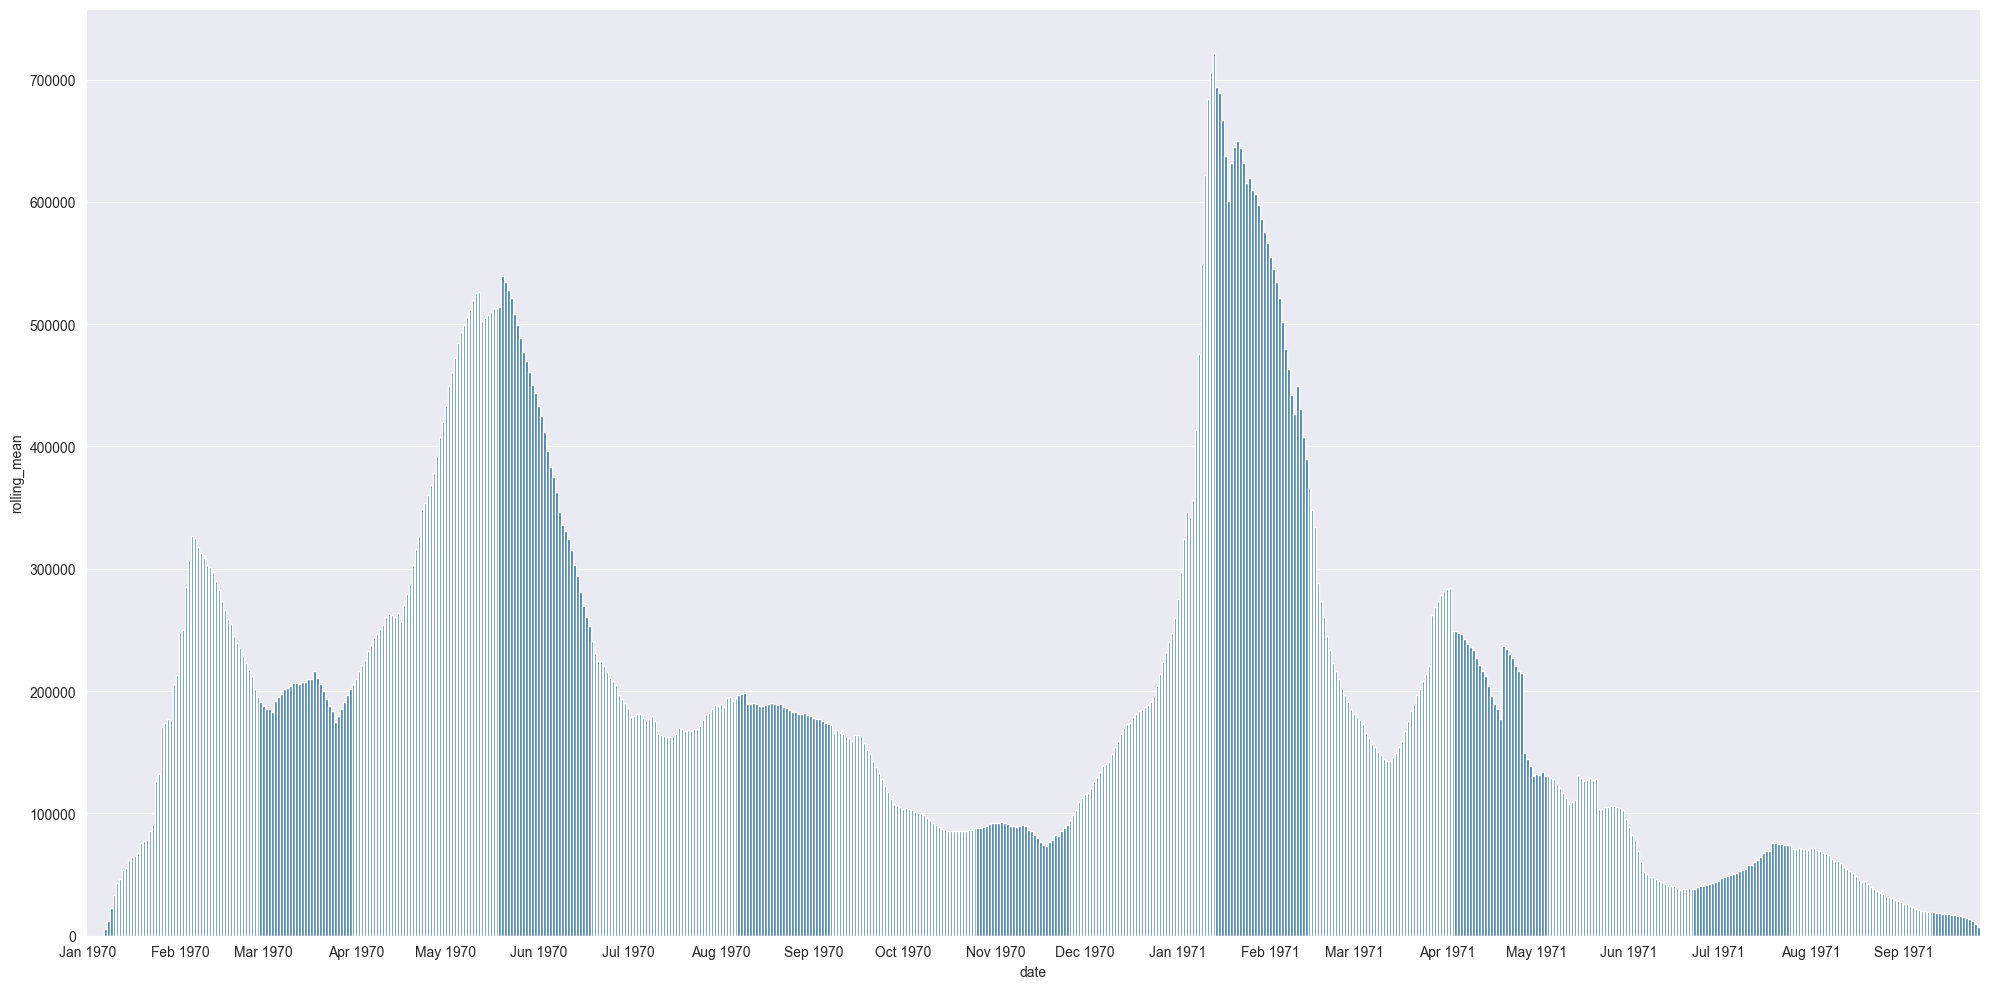

In [37]:
df_monthly = df.set_index('date').resample('D').sum()
df_monthly['rolling_mean'] = df_monthly['new_confirmed'].rolling(window=7).mean()
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=df_monthly, x='date', y='rolling_mean', ax=ax)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # 'Jan 2025', 'Feb 2025', etc.
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.tight_layout()
plt.show()

In [38]:
df['new_confirmed'].rolling(window=7).std()

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
325362    238.281846
325363    253.727544
325364    318.974771
325365    972.509958
325366    967.917303
Name: new_confirmed, Length: 325367, dtype: float64

1.2. liczby nowych śmierci,



In [39]:
df['new_deceased'].rolling(window=7).mean()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
325362     7.571429
325363     6.428571
325364     5.428571
325365    14.285714
325366    14.000000
Name: new_deceased, Length: 325367, dtype: float64

In [40]:
df['new_deceased'].rolling(window=7).std()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
325362     3.598942
325363     3.952094
325364     4.076647
325365    22.246455
325366    22.397917
Name: new_deceased, Length: 325367, dtype: float64

1.3. liczby nowych szczepień,



In [41]:
df['new_persons_vaccinated'].rolling(window=7).mean()

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
325362    290850.000000
325363    257503.428571
325364    214191.428571
325365    210681.571429
325366    220021.000000
Name: new_persons_vaccinated, Length: 325367, dtype: float64

In [42]:
df['new_persons_vaccinated'].rolling(window=7).std()

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
325362    168565.686713
325363    192453.148239
325364    181954.601534
325365    183048.552049
325366    173286.709118
Name: new_persons_vaccinated, Length: 325367, dtype: float64

1.4.1 liczba osób w pełni zaszczepionych



In [43]:
df['new_persons_fully_vaccinated'].rolling(window=7).mean()

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
325362    53652.571429
325363    48079.714286
325364    37474.142857
325365    38168.142857
325366    41690.714286
Name: new_persons_fully_vaccinated, Length: 325367, dtype: float64

In [44]:
df['new_persons_fully_vaccinated'].rolling(window=7).std()

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
              ...     
325362    35276.208984
325363    38771.524661
325364    35347.465757
325365    35044.793272
325366    31643.015231
Name: new_persons_fully_vaccinated, Length: 325367, dtype: float64

1.4.2 liczba zaaplikowanych szczepionek



In [45]:
df['new_vaccine_doses_administered'].rolling(window=7).mean()

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
325362    344502.571429
325363    305583.142857
325364    251665.571429
325365    248849.714286
325366    261711.714286
Name: new_vaccine_doses_administered, Length: 325367, dtype: float64

In [46]:
df['new_vaccine_doses_administered'].rolling(window=7).std()

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
325362    190722.741260
325363    219653.659921
325364    205095.747219
325365    206085.068633
325366    191969.404405
Name: new_vaccine_doses_administered, Length: 325367, dtype: float64